In [1]:
import json
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import gaussian_kde
import networkx as nx

import sys
sys.path.append('..')
import network_utils as ne

In [2]:
SAVEFIG = False
TITLEFONT = {'fontname': 'arial', 'size': 14}
LABELFONT = {'fontname': 'arial', 'size': 14}
LEGENDFONT = {'family': 'arial', 'size': 12}
TICKPARAM = {'family': 'arial', 'size': 12}

In [3]:
with pd.HDFStore('../data/gene_network_data.h5') as store:
    tec = store['TEC']
    rna = store['RNA']
np_tec_abs = np.abs(tec.to_numpy(copy=True))
np_rna_abs = np.abs(rna.to_numpy(copy=True))

In [4]:
# check same gene list between TEC and RNA co-expression 
(tec.columns == rna.columns).all()

np.True_

In [5]:
THRESHOLD = 0.75
rna_al = ne.threshold_weighted_adjacency_list(np_rna_abs, THRESHOLD)
tec_al = ne.threshold_weighted_adjacency_list(np_tec_abs, THRESHOLD)

rna_graph_75 = ne.construct_network(rna_al, "RNA_75", rna.columns)
tec_graph_75 = ne.construct_network(tec_al, "TEC_75", tec.columns)

In [6]:
genes_of_interest = ['PKM', 'CCT3', 'CCT4', 'CCT8', 'PSMA5']
# genes_of_interest = ['RPSA', 'CDC7', 'PHYH', 'PKM', 'CCT3', 'CCT4', 'CCT8', 'PSMA5']
gene_id = []

for g in genes_of_interest:
    gene_id.append(tec.columns.get_loc(g))

In [7]:
np_tec = tec.to_numpy(copy=True)
np_rna = rna.to_numpy(copy=True)
np_diff = np_tec - np_rna
np_diff = np_diff[gene_id, :]

subset = list(set(rna_graph_75.nodes).intersection(tec_graph_75.nodes))
np_diff = np_diff[:, subset]

np_diff = np.sort(np_diff, axis=1)[:, ::-1]

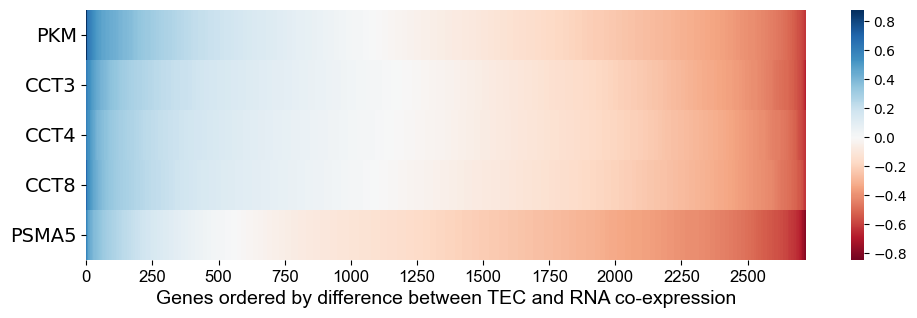

In [8]:
plt.figure(figsize=(9, 2.5))
hm = sns.heatmap(np_diff, cmap='RdBu', xticklabels=False, yticklabels=False, cbar=True, center=0)

x_ticks = [i for i in range(0, np_diff.shape[1], 250)]
plt.xticks(x_ticks, x_ticks, **TICKPARAM)

y_ticks = [i+0.5 for i in range(len(genes_of_interest))]
plt.yticks(y_ticks, genes_of_interest, size=14)
# Rasterize the main heatmap
hm.collections[0].set_rasterized(True)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

if SAVEFIG:
    plt.savefig("./supp_fig/fig4.pdf", format="pdf", bbox_inches='tight', pad_inches=0)
else:
    plt.xlabel("Genes ordered by difference between TEC and RNA co-expression", **LABELFONT)
plt.show()